In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("supermarket_sales - Sheet1.csv")

In [4]:
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Relation between product line , Total payment and gender

<AxesSubplot:xlabel='Product line', ylabel='Total'>

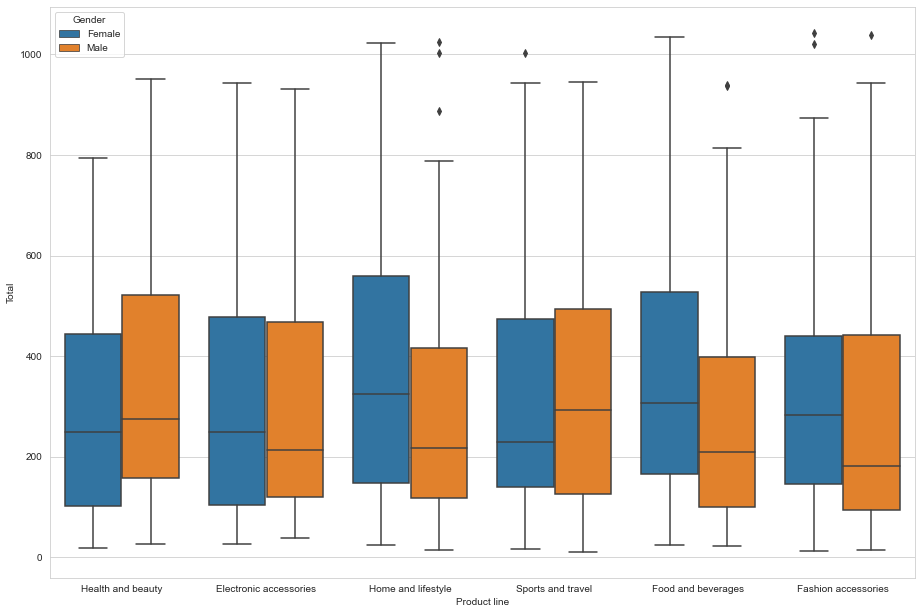

In [14]:
f, ax = plt.subplots(figsize=(15.5, 10.5))

sns.boxplot(x="Product line", y="Total",
            hue="Gender", palette="tab10",
            data=data)

-Women are awarded the highest overall payout in the category of home and lifestyle products.
-Males are awarded the highest overall payment in health and beauty items. (I guess that they purchase these items as gifts or that there is a problem with the data)
-Females spend more money on food, beverages, and lifestyle and home goods.
-The most selling products are in home and lifestyle followed by food and beverages
-As usual, women like shopping more than men do.


Relatio between customer type and total payment

<AxesSubplot:xlabel='Customer type', ylabel='Total'>

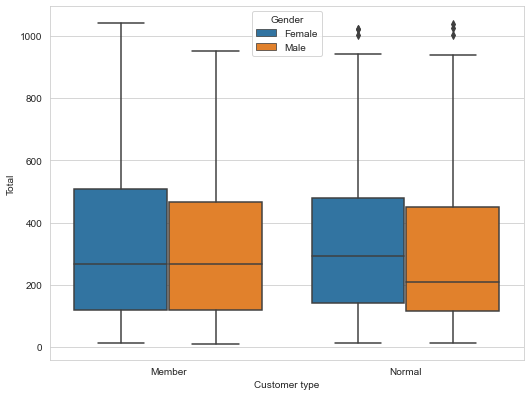

In [17]:
f, ax = plt.subplots(figsize=(8.5, 6.5))

sns.boxplot(x="Customer type", y="Total",
            hue="Gender", palette="tab10",
            data=data)

Members pay more than normal customers
In the two types of customers females pay more

Relation between Payment method ,Total payment and Gender

<AxesSubplot:xlabel='Payment', ylabel='Total'>

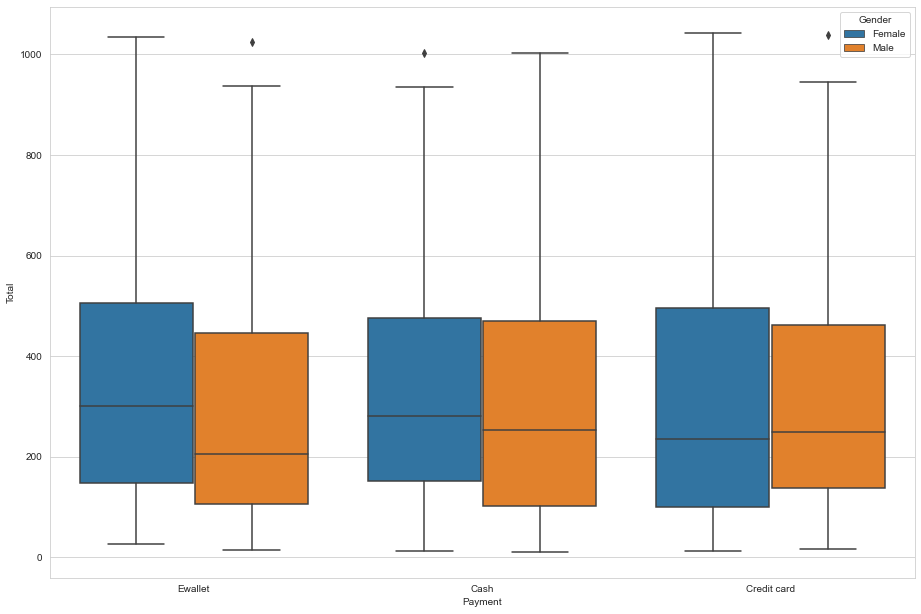

In [19]:
f, ax = plt.subplots(figsize=(15.5, 10.5))

sns.boxplot(x="Payment", y="Total",
            hue="Gender", palette="tab10",
            data=data)

Most of the customers pay using E-wallets and Credit Cards

Relation between product lines ,Gender , count of sells of each line

<AxesSubplot:xlabel='Product line', ylabel='Count'>

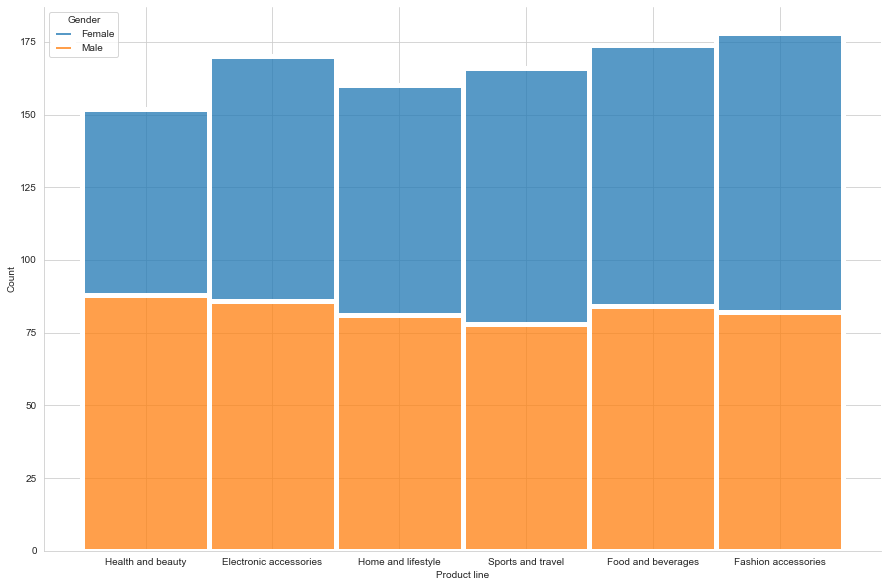

In [42]:
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f)

sns.histplot(
    data,
    x="Product line", hue="Gender",
    multiple="stack",
    palette="tab10",
    edgecolor="1",
    linewidth=5,

)

The most selling products are Fashion accessories ,food and beverages
The majority of products are purchased by women compared to men.

Divide the month into There Thirds

In [54]:
data['month_part']=data['Date'].apply(lambda month: str(month).split("/")[1])
data['month_part']=data['month_part'].apply(lambda month: "T1" if(int(month) in range(1,11))else "T2" if(int(month) in range(11,21))else "T3" if(int(month) in range(21,32)) else  0 )

Relation between month part and total payment

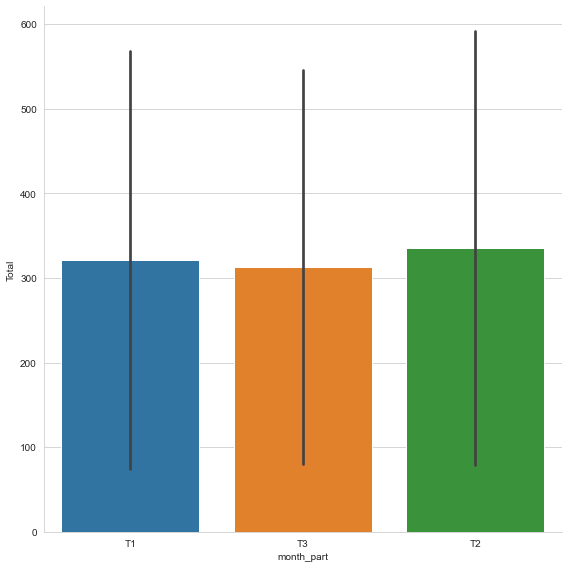

In [53]:
g = sns.catplot(
    data=data, kind="bar",
    x="month_part", y="Total",
    ci="sd", palette="tab10", alpha=1, height=8
)

Customer buy more in the second third of the month -> 10-20

Relation between City and gross income

<AxesSubplot:xlabel='City', ylabel='gross income'>

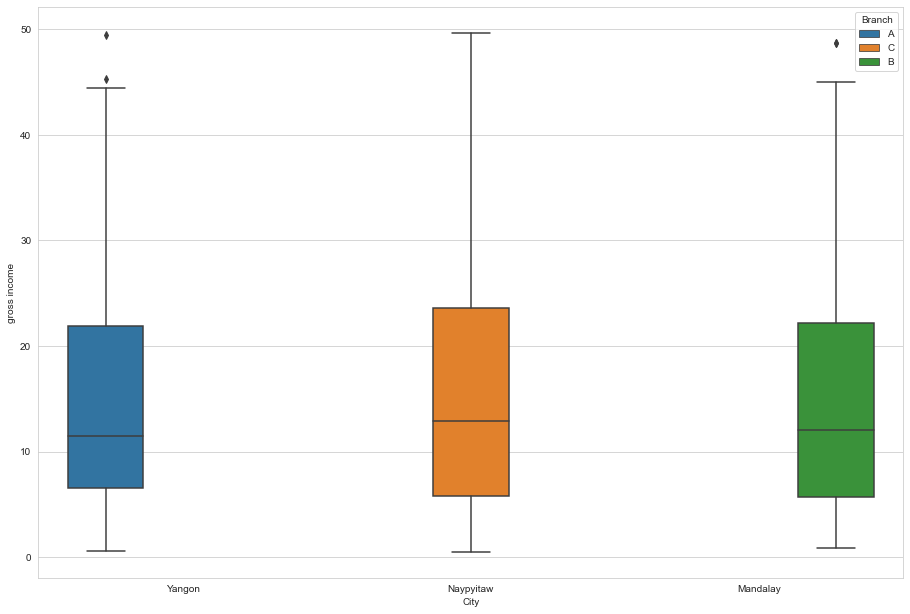

In [66]:
f, ax = plt.subplots(figsize=(15.5, 10.5))

sns.boxplot(x="City", y="gross income",
            hue="Branch", palette="tab10",
            data=data)


the most gross in income in Naypyitaw city store



Relation between branches and Rating

<AxesSubplot:xlabel='City', ylabel='Rating'>

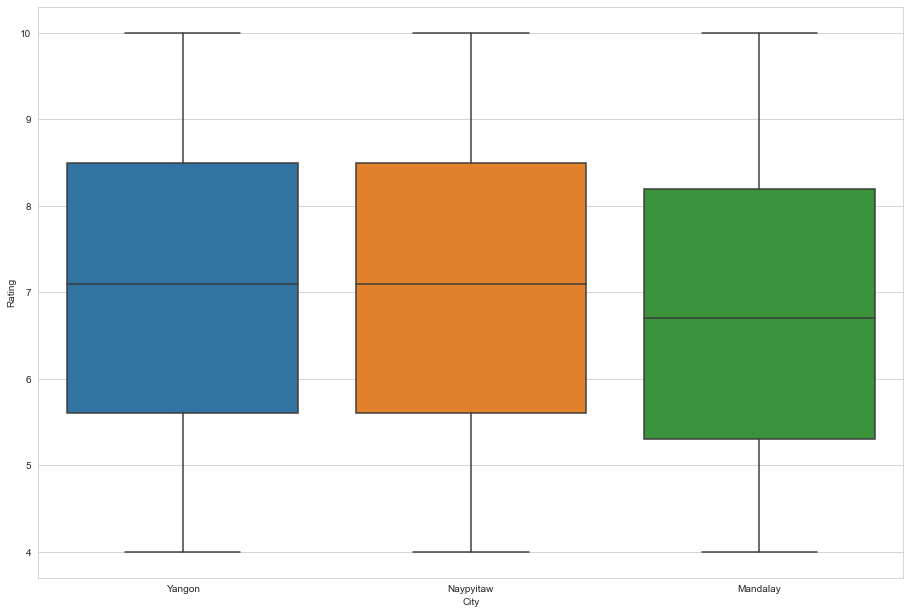

In [76]:
f, ax = plt.subplots(figsize=(15.5, 10.5))
sns.boxplot(x="City", y="Rating",
            palette="tab10",
            data=data)

In one hand Yangon and Naypyitaw approximately have the same rating

in the other hand  Mandalay has a rating less the others "I think there is an issue in this store must be solved"

Divide day into quarters

In [73]:
data['day_part']=data['Time'].apply(lambda month: str(month).split(":")[0])
data['day_part']=data['day_part'].apply(lambda hour: "q1" if(int(hour) in range(0,6))else "q2" if(int(hour) in range(6,12))else "q3" if(int(hour) in range(12,18)) else "q4" if (int(hour) in range(18,24)) else 0 )

Relation between day part and Total payments

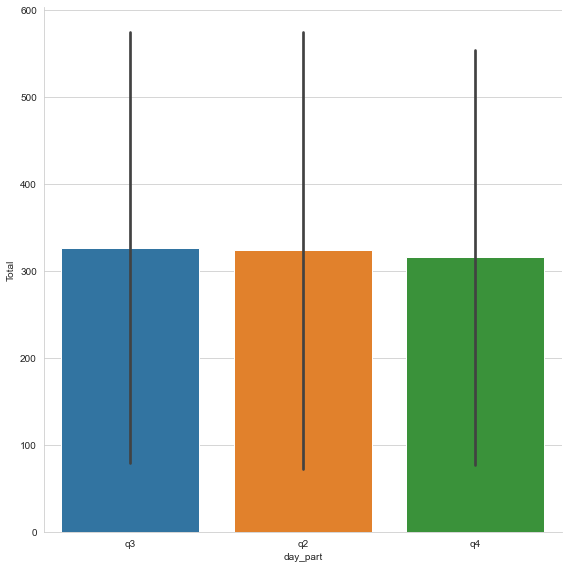

In [74]:
g = sns.catplot(
    data=data, kind="bar",
    x="day_part", y="Total",
    ci="sd", palette="tab10", alpha=1, height=8
)

The first quarter of the day is not found in the graph "Maybe the store was closed between 12am to 6am"
The two most active selling quarters of the day are the second and third.